## Exploratory Data Analysis

##### Importing libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
import calendar
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srija\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##### Load Data

In [17]:
data_clean = pd.read_pickle('data/data_clean.pkl')
data_clean.head()

,content,date,retweets,favorites
0,be sure to tune in and watch trump on late nig...,2009-05-04 13:54:25,510,917
1,trump will be on the view tomorrow morning to ...,2009-05-04 20:00:10,34,267
2,trump top ten financial on late show with very...,2009-05-08 08:38:08,13,19
3,new post celebrity apprentice finale and learn...,2009-05-08 15:40:15,11,26
4,my persona will never be that of a wallflower ...,2009-05-12 09:07:28,1375,1945


##### Load document term matrix and transpose

In [18]:
dtm_yearly = pd.read_pickle('data/dtm_yearly.pkl')
dtm_yearly = dtm_yearly.transpose()
dtm_yearly.head()

year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
abandon,0,0,0,1,2,0,1,2,0,3,0,2
abandoned,0,0,2,3,8,0,1,1,1,5,2,1
abbas,0,0,0,0,0,0,0,0,1,0,0,0
abhor,0,0,0,0,1,0,0,0,0,0,0,0
abide,0,0,0,0,0,1,0,0,0,0,0,0


##### Extracting top 30 words for every year

In [19]:
top_words = {}
for year in dtm_yearly.columns:
    top = dtm_yearly[year].sort_values(ascending=False).head(30)
    top_words[year] = list(zip(top.index,top.values))

for year, words in top_words.items():
    print(year)
    print(','.join([word for word, count in words[0:30]]))
    print()

2009
trump,like,think,champion,new,book,watch,read,happy,contest,enter,check,great,late,interview,today,know,wishing,dont,list,world,miss,big,apprentice,day,business,self,university,universe,build

2010
trump,apprentice,great,tonight,new,night,tune,miss,fantastic,hotel,episode,celebrity,larry,live,golf,international,sure,king,season,las,pageant,best,beautiful,bret,ill,happy,tomorrow,forget,dont,universe

2011
china,interview,trump,new,great,today,watch,book,debate,night,tonight,deal,debt,dont,time,yesterday,world,oil,apprentice,tower,golf,economy,people,country,tax,celebrity,fox,need,spending,record

2012
great,trump,china,interview,just,thanks,good,new,people,time,like,dont,president,today,night,country,make,big,deal,job,election,did,record,amazing,going,tonight,watch,year,doing,debt

2013
thanks,great,trump,thank,just,good,like,people,think,president,true,time,love,new,big,best,dont,going,really,country,work,run,know,make,apprentice,doing,job,better,world,need

2014
trump,great,presi

### Word Cloud

In [20]:
corpus_yearly = pd.read_pickle('data/corpus_yearly.pkl')
corpus_yearly

,transcript
2009,be sure to tune in and watch trump on late nig...
2010,celebrity apprentice to outstanding list of se...
2011,watch me on late night with jimmy tomorrow nig...
2012,my interview the make great again filing and t...
2013,and the are laughing at the deal they just got...
2014,today is the first day of the rest of your lif...
2015,for president the club was amazing tonight eve...
2016,happy new year from thank you to my great fami...
2017,well the new year we will together make great ...
2018,the united foolishly given more than billion i...


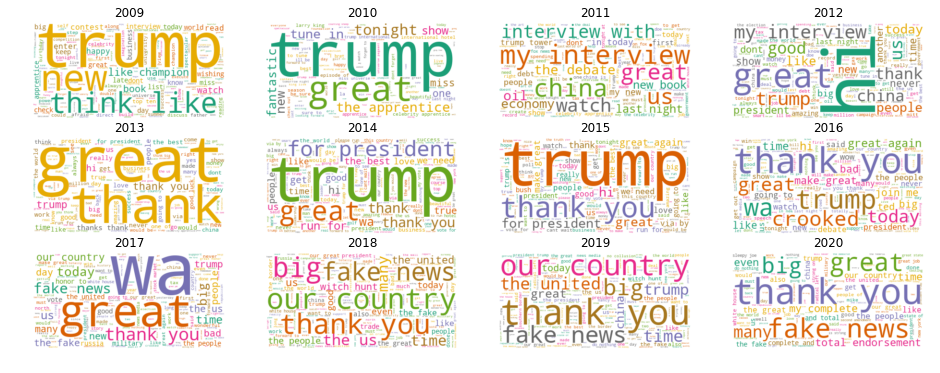

In [248]:
stop_words = stopwords.words('english')

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [16, 6]

for index, year in enumerate(corpus_yearly.index):
    wc.generate(corpus_yearly.transcript[year])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(year)
        
plt.savefig('plots/2_trump_worldcloud.jpg') 
plt.show()

### Vocabulary

In [65]:
unique_words = []

for year in dtm_yearly.columns:
    words = dtm_yearly[year].nonzero()[0].size
    unique_words.append(words)
print('unique words: ' + str(unique_words))
print('length of unique words list: ' + str(len(unique_words)))

unique words: [196, 388, 1433, 3605, 4413, 4012, 4084, 3008, 2688, 3798, 4426, 3054]
length of unique words list: 12


In [66]:
data_clean = pd.read_pickle('data/data_clean.pkl')

group = data_clean.groupby(data_clean.date.dt.year)

no_of_tweets = []

for year, data in group:
    no_of_tweets.append(len(data))

print('no of tweets: ' + str(no_of_tweets))
print('length of no_of_tweets list: ' + str(len(no_of_tweets)))

no of tweets: [56, 143, 869, 4193, 8203, 6001, 7707, 3945, 2231, 3001, 4590, 2413]
length of no_of_tweets list: 12


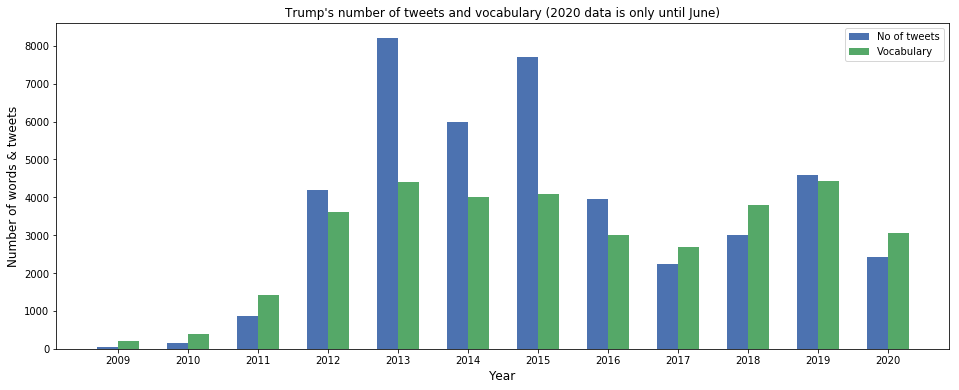

In [247]:
index = np.arange(12)
bar_width = 0.3

fig, ax = plt.subplots()
ax.bar(index, no_of_tweets, bar_width, label="No of tweets")
ax.bar(index + bar_width, unique_words, bar_width, label="Vocabulary")

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of words & tweets', fontsize=12)
ax.set_title("Trump's number of tweets and vocabulary (2020 data is only until June)", fontsize=12)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(dtm_yearly.columns)
ax.legend()
plt.savefig('plots/2_trump_vocabulary.jpg') 
plt.show()

### Interesting words

In [222]:
interesting_words = dtm_yearly.transpose()[['stupid','china','fake','news','thank', 'wall', 'great']]
interesting_words

,stupid,china,fake,news,thank,wall,great
year,,,,,,,
2009,0,0,0,0,0,0,3
2010,0,0,0,1,0,1,29
2011,2,78,0,18,2,3,56
2012,22,216,4,41,63,8,409
2013,72,113,1,70,444,4,987
2014,34,40,0,41,389,5,771
2015,17,38,9,78,438,48,1066
2016,5,15,4,52,634,41,571
2017,1,54,176,191,160,31,478


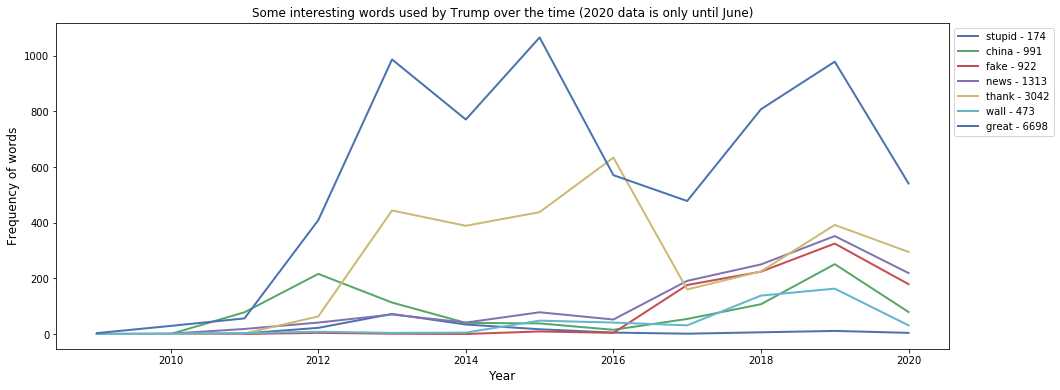

In [246]:
for word in interesting_words:
    plt.plot(dtm_yearly.transpose()[word], label=word + ' - ' + str(sum(dtm_yearly.transpose()[word])), linewidth=2)
    plt.title('Some interesting words used by Trump over the time (2020 data is only until June)', fontsize=12)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Frequency of words', fontsize=12)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.savefig('plots/2_interesting_words.jpg') 